In [29]:
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [32]:
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})

In [33]:
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})

In [34]:
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})

In [35]:
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})

In [36]:
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})

In [37]:
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})

In [38]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [39]:
df = pd.get_dummies(df,columns =['furnishingstatus'],drop_first = True)

In [40]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [41]:
X = df.drop('price', axis=1)
y = df['price']

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [50]:
y_pred = model.predict(X_test)

In [52]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:",mae)
print("MSE:",mse)
print("R2:",r2)

MAE: 970043.403920164
MSE: 1754318687330.664
R2: 0.6529242642153184


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

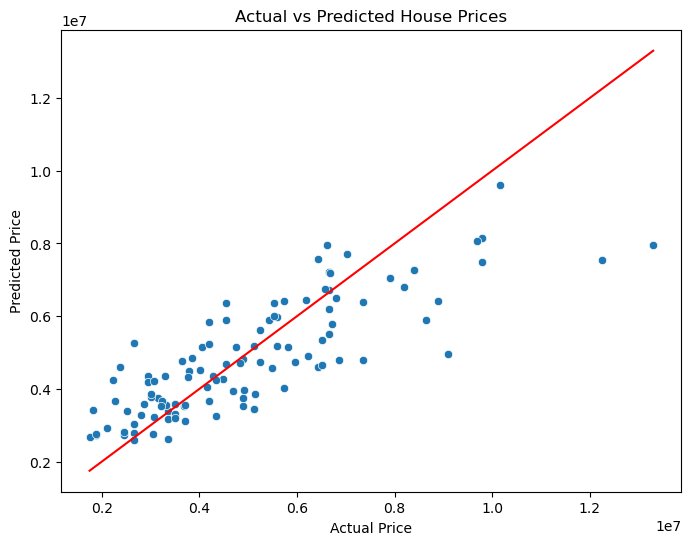

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # perfect line
plt.show()

In [55]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_})

print(coefficients.sort_values(by='Coefficient', ascending=False))

                            Feature   Coefficient
2                         bathrooms  1.094445e+06
8                   airconditioning  7.914267e+05
7                   hotwaterheating  6.846499e+05
10                         prefarea  6.298906e+05
3                           stories  4.074766e+05
6                          basement  3.902512e+05
4                          mainroad  3.679199e+05
5                         guestroom  2.316100e+05
9                           parking  2.248419e+05
1                          bedrooms  7.677870e+04
0                              area  2.359688e+02
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05
